In [30]:
#Visualise data

In [31]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim

import torchfunc
import flowDatasetV4
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt
import statistics

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [32]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((500,500)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((500,500)),
        transforms.ToTensor(),
        normalize
    ]),
}


train_dataset = flowDatasetV4.flowDataset('x',False,0.2,data_transforms['train'])
test_dataset = flowDatasetV4.flowDataset('x',True,0.2,data_transforms['validation'])

In [33]:
data = train_dataset.label
print(len(data))

1648


In [34]:
data

[-0.0037,
 -0.0037,
 0.0049,
 -0.0033,
 0.498,
 0.498,
 0.498,
 0.498,
 0.498,
 0.1934,
 0.1934,
 0.1934,
 0.1934,
 0.1934,
 -0.0033,
 0.1934,
 0.1934,
 0.1934,
 0.1934,
 0.1934,
 0.2439,
 0.2439,
 0.2439,
 0.2439,
 0.2439,
 -0.0033,
 0.2439,
 0.2439,
 0.2439,
 0.2439,
 0.2439,
 0.2941,
 0.2941,
 0.2941,
 0.2941,
 0.2941,
 -0.0033,
 0.2941,
 0.2941,
 0.2941,
 0.2941,
 0.2941,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 -0.0033,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 -0.0033,
 0.2844,
 0.2844,
 0.2844,
 0.2844,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 -0.0033,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 0.3858,
 -0.0033,
 0.3858,
 0.3858,
 0.3858,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 -0.0033,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 0.4851,
 -0.0033,
 0.4851,
 0.4851,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,


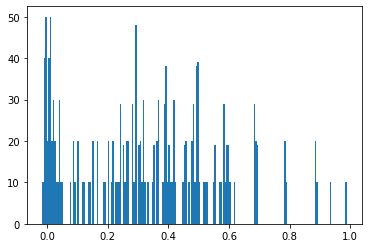

In [35]:
plt.hist(data, bins=200)
plt.show()

In [36]:
mean = statistics.mean(data)
print(mean)

std = statistics.stdev(data)
print(std)

0.3243921116504854
0.23666038832772873


In [37]:
std_data =[]
for i in data:
    std_data.append((i-mean)/std)

4.7543992223867265e-17
1.0


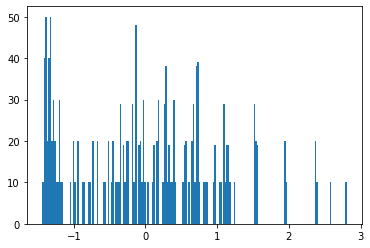

In [38]:
mean = statistics.mean(std_data)
print(mean)

std = statistics.stdev(std_data)

print(std)

plt.hist(train_dataset.std_label, bins=200)
plt.show()

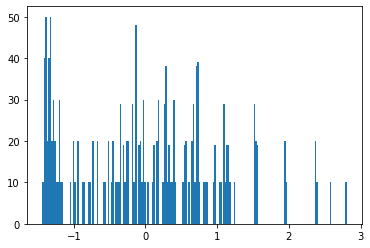

In [39]:
plt.hist(std_data, bins=200)
plt.show()

In [40]:
#Normalise data
minvalue = min(std_data)
maxValue = max(std_data)
print(minvalue)
print(maxValue)

-1.4408499625136992
2.8048964722827607


In [41]:
norm = []

for i in std_data:
    temp1 = i - minvalue
    temp2 = maxValue-minvalue
    norm.append(temp1/temp2)

In [42]:
minvalue = min(norm)
maxValue = max(norm)
print(minvalue)
print(maxValue)

0.0
1.0


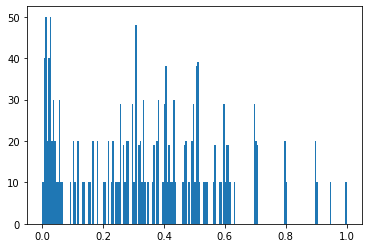

In [43]:
plt.hist(norm, bins=200)
plt.show()

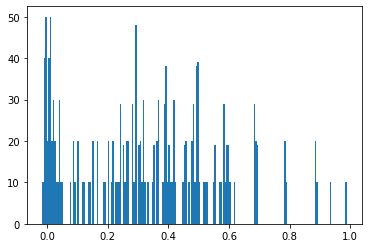

In [44]:
plt.hist(data, bins=200)
plt.show()